# 1. Step 1

In [81]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 2. Step 2

`gpd.read_file()` creates a GeoDataFrame, similar to Pandas DataFrames

In [82]:
states = gpd.read_file('us-states.json')
print(states.head())

   id        name  density                                           geometry
0  01     Alabama   94.650  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1  02      Alaska    1.264  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  04     Arizona   57.050  POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3  05    Arkansas   56.430  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  06  California  241.700  POLYGON ((-123.23326 42.00619, -122.37885 42.0...


# 3. Step 3
You will get a warning for this next line of code that you can ignore. The TL;DR is we are using a coordinate system that uses a geographic coordinate system instead of a projected coordinate system. Uncomment out the first line of code to remove the warning and see what a projected coordinate system may look like.

In [83]:
# states["geometry"] = states["geometry"].to_crs(epsg=5070)
states["centroid_x"] = states.geometry.centroid.x
states["centroid_y"] = states.geometry.centroid.y

/tmp/ipython-input-3258897741.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states["centroid_x"] = states.geometry.centroid.x
/tmp/ipython-input-3258897741.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states["centroid_y"] = states.geometry.centroid.y


# 4. Step 4

In [84]:
population_df = pd.read_csv('population_data.csv')
print(population_df.head())

        STATE  POPULATION
0     Alabama     5024356
1      Alaska      733378
2     Arizona     7151507
3    Arkansas     3011555
4  California    39538245


# 5. Step 5

In [85]:
data_to_plot = states.merge(population_df, left_on="name", right_on="STATE")
print(data_to_plot.head())

   id        name  density                                           geometry  \
0  01     Alabama   94.650  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...   
1  02      Alaska    1.264  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...   
2  04     Arizona   57.050  POLYGON ((-109.0425 37.00026, -109.04798 31.33...   
3  05    Arkansas   56.430  POLYGON ((-94.47384 36.50186, -90.15254 36.496...   
4  06  California  241.700  POLYGON ((-123.23326 42.00619, -122.37885 42.0...   

   centroid_x  centroid_y       STATE  POPULATION  
0  -86.827783   32.789907     Alabama     5024356  
1 -152.542689   64.220419      Alaska      733378  
2 -111.663296   34.293393     Arizona     7151507  
3  -92.440920   34.898249    Arkansas     3011555  
4 -119.614389   37.253895  California    39538245  


# 6. Step 6

In [86]:
data_to_plot = data_to_plot[['STATE', 'POPULATION', 'centroid_x', 'centroid_y', 'geometry']]
print(data_to_plot.head())

        STATE  POPULATION  centroid_x  centroid_y  \
0     Alabama     5024356  -86.827783   32.789907   
1      Alaska      733378 -152.542689   64.220419   
2     Arizona     7151507 -111.663296   34.293393   
3    Arkansas     3011555  -92.440920   34.898249   
4  California    39538245 -119.614389   37.253895   

                                            geometry  
0  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...  
1  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...  
2  POLYGON ((-109.0425 37.00026, -109.04798 31.33...  
3  POLYGON ((-94.47384 36.50186, -90.15254 36.496...  
4  POLYGON ((-123.23326 42.00619, -122.37885 42.0...  


In [87]:
data_to_plot = data_to_plot[~data_to_plot["STATE"].isin(["Alaska", "Hawaii", "District of Columbia"])]
data_to_plot.insert(
    data_to_plot.columns.get_loc("POPULATION") + 1,
    "POP_MILLIONS",
    data_to_plot["POPULATION"] / 1_000_000
    )
data_to_plot.drop(columns=["POPULATION"], inplace=True)
print(data_to_plot.head())

        STATE  POP_MILLIONS  centroid_x  centroid_y  \
0     Alabama      5.024356  -86.827783   32.789907   
2     Arizona      7.151507 -111.663296   34.293393   
3    Arkansas      3.011555  -92.440920   34.898249   
4  California     39.538245 -119.614389   37.253895   
5    Colorado      5.773733 -105.548773   38.999340   

                                            geometry  
0  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...  
2  POLYGON ((-109.0425 37.00026, -109.04798 31.33...  
3  POLYGON ((-94.47384 36.50186, -90.15254 36.496...  
4  POLYGON ((-123.23326 42.00619, -122.37885 42.0...  
5  POLYGON ((-107.91973 41.00391, -105.72895 40.9...  


# 7. Step 7 Option 1

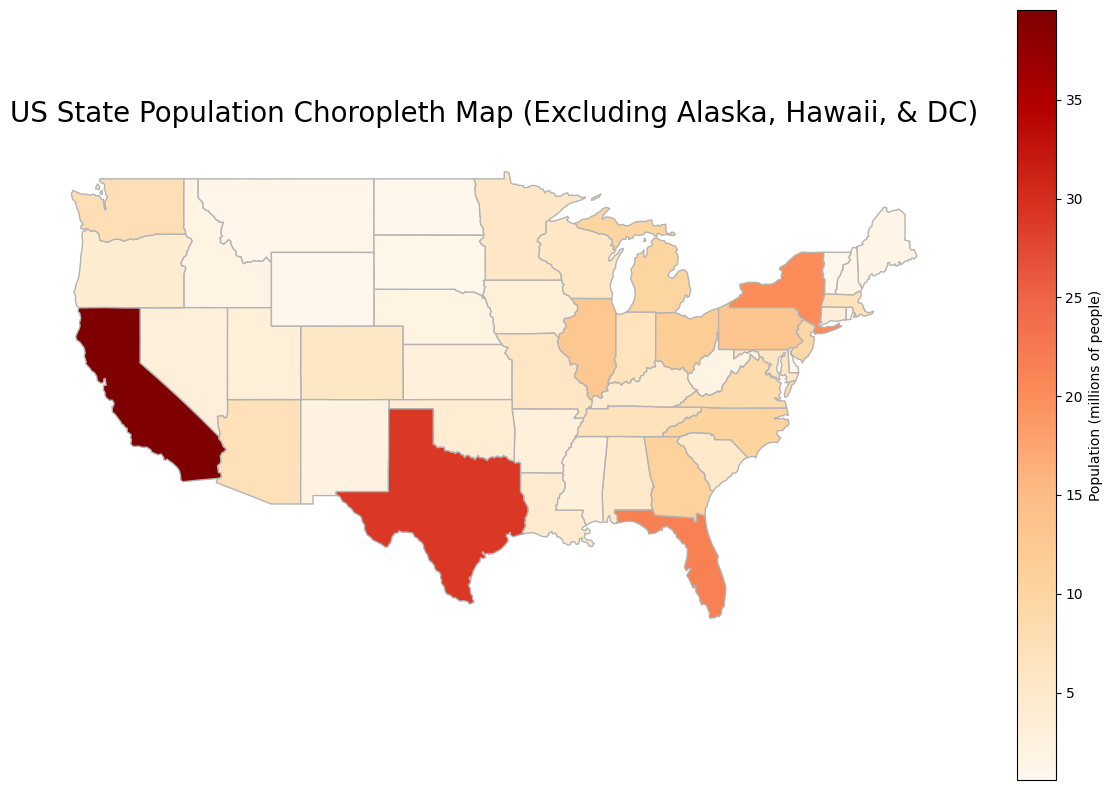

In [88]:


data_to_plot.plot(
    column="POP_MILLIONS",
    cmap="OrRd",
    edgecolor="0.7",
    figsize=(15, 10),
    legend=True,
    legend_kwds={"label": "Population (millions of people)"}
)

plt.title("US State Population Choropleth Map (Excluding Alaska, Hawaii, & DC)", fontsize=20, pad=20)
plt.axis("off")
plt.show()


# 7. Step 7 Option 2

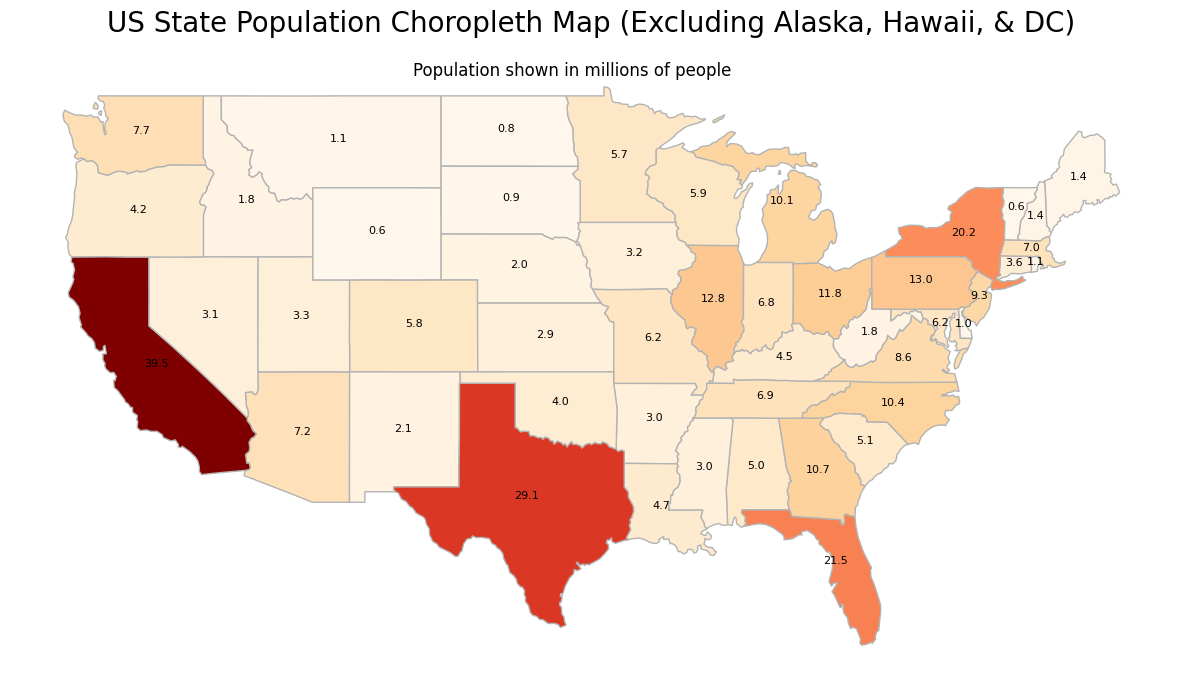

In [89]:
data_to_plot.plot(
    column="POP_MILLIONS",
    cmap="OrRd",
    edgecolor="0.7",
    figsize=(15, 10),
    legend=False
)

plt.title("US State Population Choropleth Map (Excluding Alaska, Hawaii, & DC)", fontsize=20, pad=20)
plt.suptitle("Population shown in millions of people", fontsize=12, y=0.8)
plt.axis("off")


for idx in data_to_plot.index:
    plt.text(data_to_plot.at[idx, "centroid_x"],
             data_to_plot.at[idx, "centroid_y"],
            f'{data_to_plot.at[idx, "POP_MILLIONS"]:,.1f}',
             horizontalalignment='center',
        fontsize=8
    )

plt.show()
